#Data Visualization

- Seaborn을 활용하여 손쉽게 데이터를 가시화 하자!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from collections import Counter
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# # 한글 폰트 사용을 위한 설정
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

In [3]:
# import matplotlib.font_manager as fm
# fm._rebuild()
# plt.rc('font', family='NanumGothic')

In [4]:
# for fontInfo in fm.fontManager.ttflist:
#     if 'Nanum' in fontInfo.name:
#         print(fontInfo.name+" = "+fontInfo.fname)

In [5]:
train = pd.read_csv('/content/drive/MyDrive/캐글스터디/dacon신용카드사용자예측/train.csv')
test = pd.read_csv('/content/drive/MyDrive/캐글스터디/dacon신용카드사용자예측/test.csv')
submit = pd.read_csv('/content/drive/MyDrive/캐글스터디/dacon신용카드사용자예측/submit_file.csv')

In [6]:
train
#

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


365243
-15713


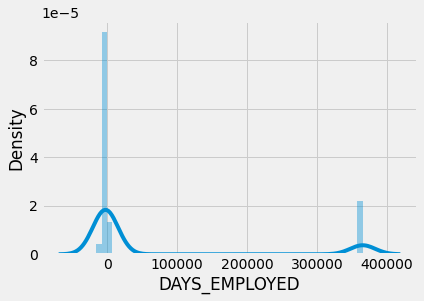

In [ ]:
print(max(train['DAYS_EMPLOYED']))
print(min(train['DAYS_EMPLOYED']))
sns.distplot(train['DAYS_EMPLOYED'],label='0.0', hist=True)
#데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
#양수 값은 고용되지 않은 상태를 의미함

#데이터의 결측치 확인

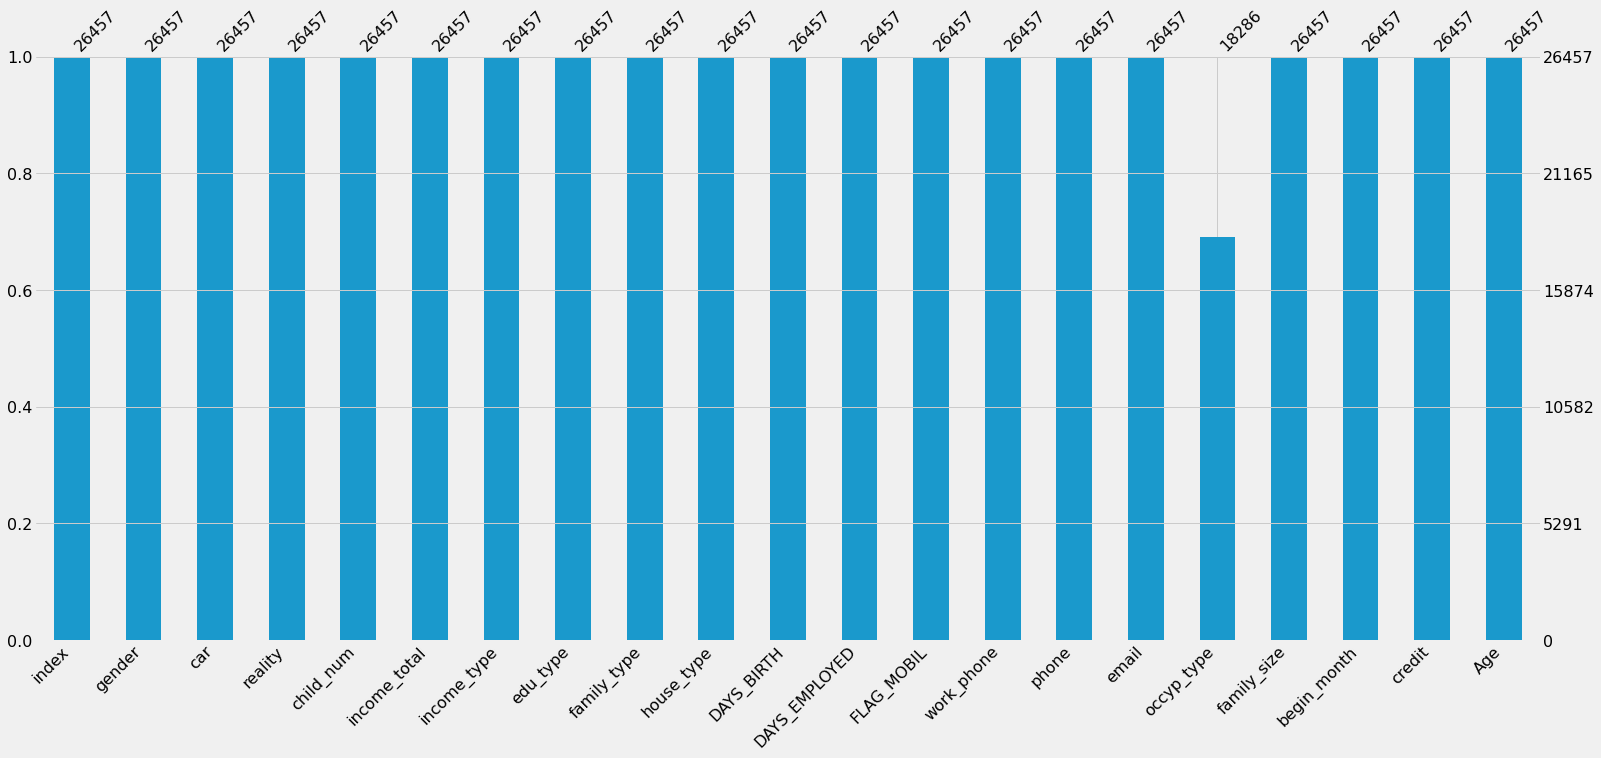

In [ ]:
import missingno as msno
msno.bar(df=train.iloc[:, :], color=(0.1, 0.6, 0.8))

In [7]:
train = train.fillna({'occyp_type':'No job'})

In [8]:
train['Age'] = abs(train['DAYS_BIRTH'])/365
train = train.astype({'Age': 'int'})

In [13]:
for i in range(26457):
  if train['child_num'][i]>5:
    train['child_num'][i] = 6

for i in range(len(test)):
  if test['child_num'][i]>5:
    test['child_num'][i] = 6

In [14]:
for i in range(26457):
  if train['family_size'][i]>=7:
    train['family_size'][i] = 7

for i in range(len(test)):
  if test['family_size'][i]>=7:
    test['family_size'][i] = 7

In [ ]:
#train['Age'].value_counts()

In [ ]:
#train['Age'].head()

In [11]:
for i in range(0,len(train['Age'])):
  if 20<= train['Age'][i]<= 29:
    train['Age'][i] = 20
  elif 30<= train['Age'][i]<= 39:
    train['Age'][i] = 30
  elif 40<= train['Age'][i]<= 49:
    train['Age'][i] = 40
  elif 50<= train['Age'][i]<= 59:
    train['Age'][i] = 50
  elif 60<= train['Age'][i]<= 69:
    train['Age'][i] = 60

train['Age'].value_counts()

30    7585
40    6769
50    5739
20    3608
60    2756
Name: Age, dtype: int64

In [ ]:
# sns.pairplot(train, hue="credit")

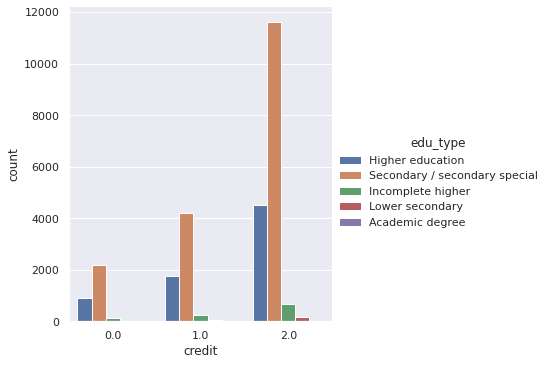

In [12]:
sns.set_theme(style="darkgrid")
sns.catplot(x='credit',data = train,hue='edu_type',kind='count')#,col = 'credit'

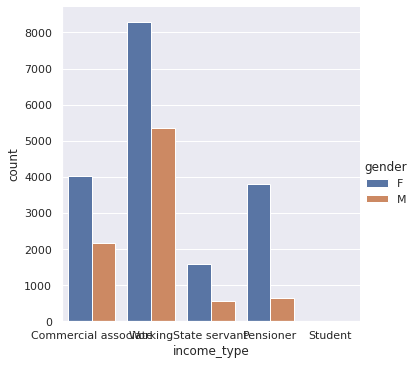

In [ ]:
sns.catplot(x='income_type',data = train,hue='gender',kind='count') #,col = 'car'

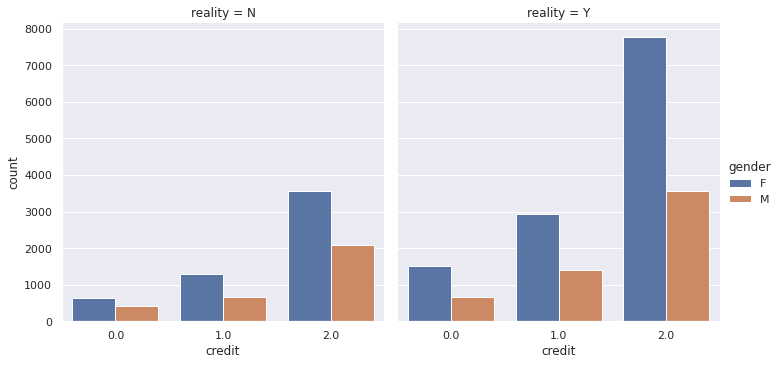

In [ ]:
sns.catplot(x='credit',data = train,hue='gender',col = 'reality',kind='count')

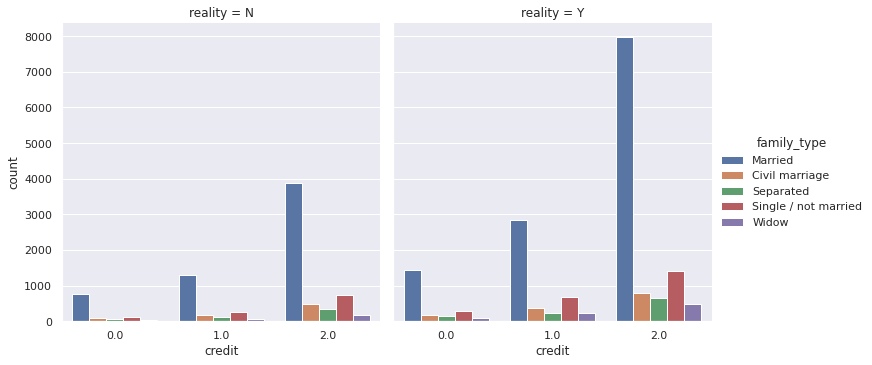

In [ ]:
sns.catplot(x='credit',data = train,hue='family_type',col = 'reality',kind='count')

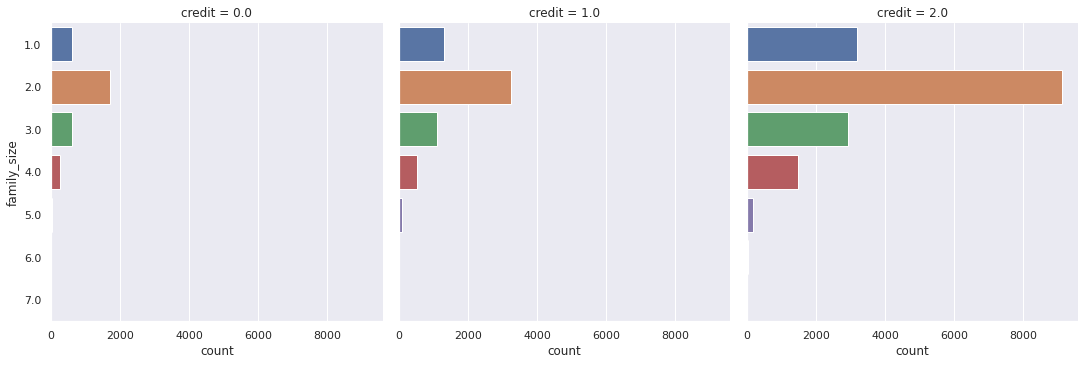

In [17]:
sns.catplot(y='family_size',data = train,kind='count',col = 'credit')#,hue='credit'

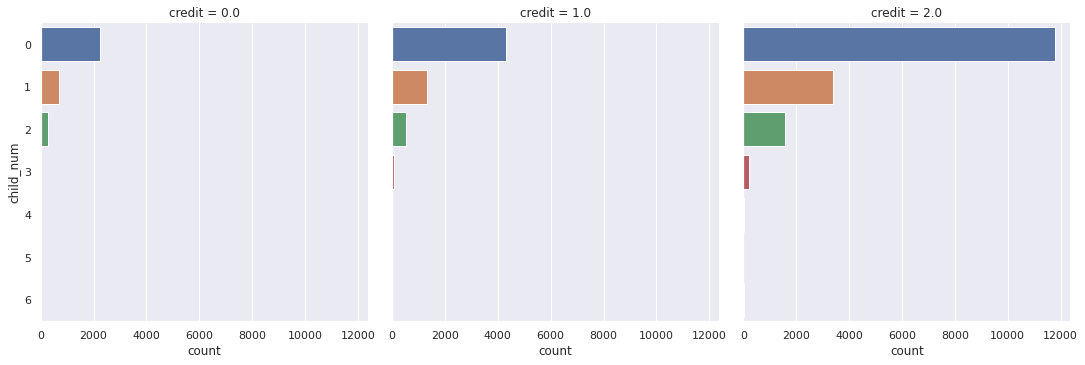

In [18]:
sns.catplot(y='child_num',data = train,kind='count',col = 'credit')#,hue='credit'

In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
#minus 변경하고
#구간화 함수
def make_bin(variable, n):
    train[variable]=-train[variable]
    test[variable]=-test[variable]
    count, bin_dividers =np.histogram(train[variable], bins=n) #train의 구간화를 적용
    bin_names=[str(i) for i in range(n)]
    train[variable]=pd.cut(x=train[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    test[variable]=pd.cut(x=test[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    test[variable].fillna(str(0), inplace=True) #test에는 없는 것을 임의의 값으로 채움
    ##########################################################
    train[variable]=label_encoder.fit_transform(train[variable])
    test[variable]=label_encoder.transform(test[variable])

In [ ]:
#make_bin('DAYS_BIRTH', n=10)
make_bin('DAYS_EMPLOYED', n=500)
make_bin('begin_month', n=4)

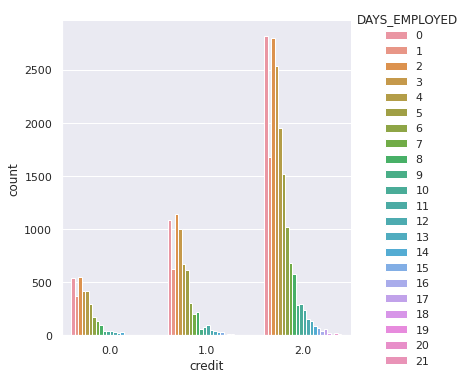

In [ ]:
sns.catplot(x='credit',data = train,hue='DAYS_EMPLOYED',kind='count')#,col = 'DAYS_EMPLOYED'

In [ ]:
# sns.catplot(x='credit',data = train,hue='DAYS_EMPLOYED',kind='count')#,col = 'DAYS_EMPLOYED'

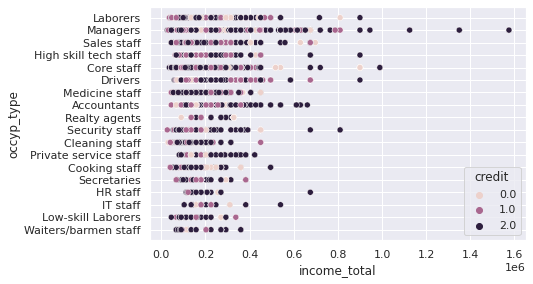

In [ ]:
a=sns.scatterplot(data=train, x="income_total", y="occyp_type",hue = 'credit')

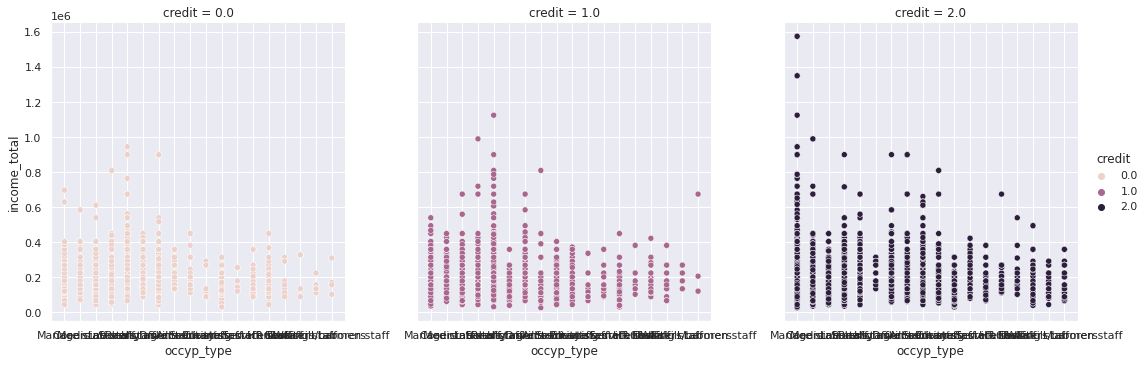

In [ ]:
sns.relplot(
    data=train, x="occyp_type", y="income_total",
    col="credit",hue='credit',
    kind="scatter"
)#, hue="credit"

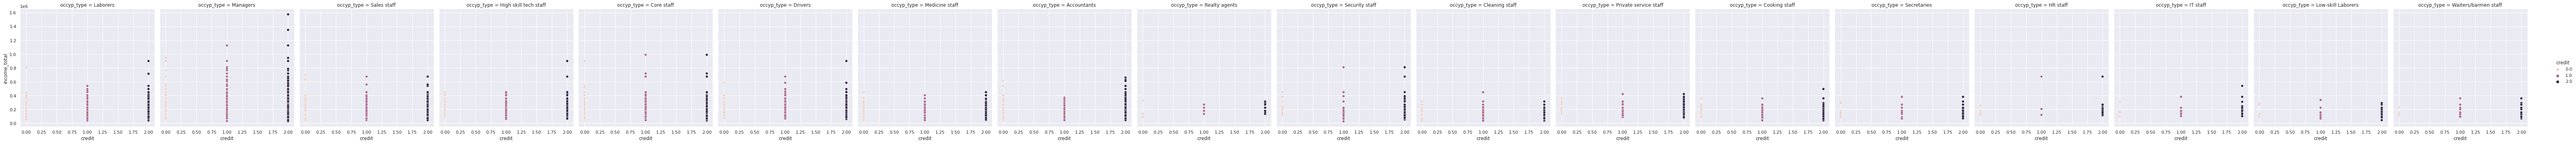

In [ ]:
sns.relplot(
    data=train, x="credit", y="income_total",
    col="occyp_type", hue="credit",
    kind="scatter"
)

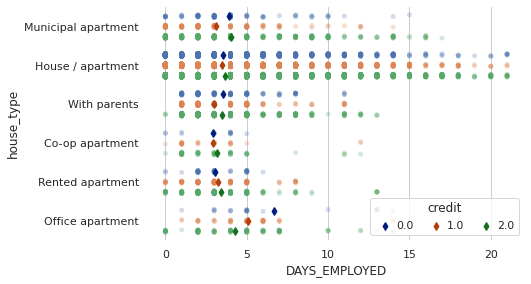

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(train, "credit", var_name="house_type")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="DAYS_EMPLOYED", y="house_type", hue="credit",
              data=train, dodge=True, alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="DAYS_EMPLOYED", y="house_type", hue="credit",
              data=train, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="credit",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

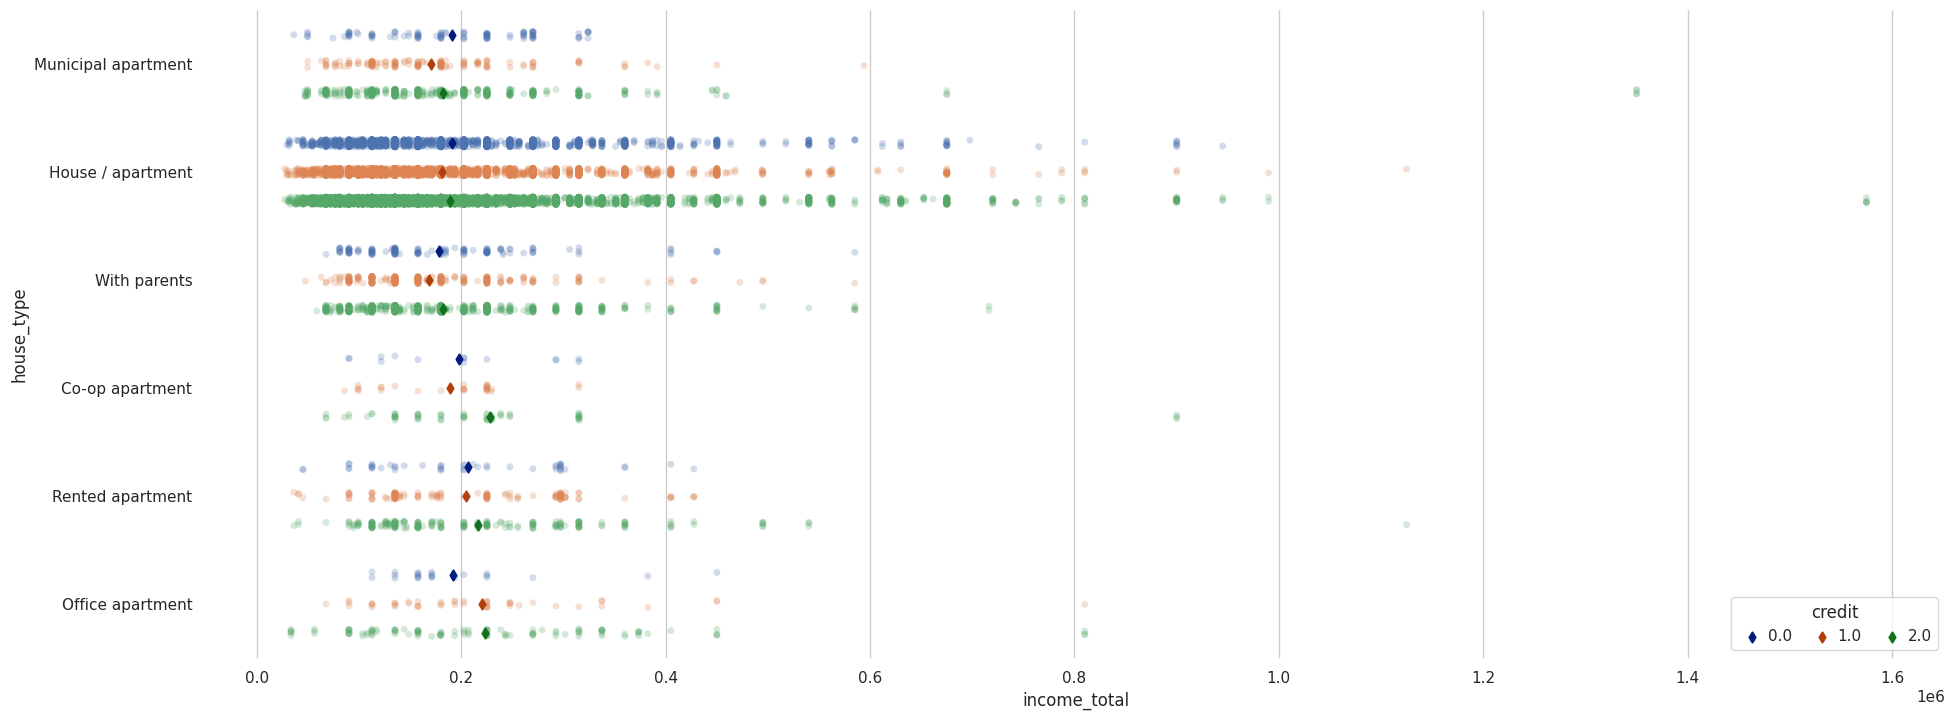

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(train, "credit", var_name="house_type")

# Initialize the figure
f, ax = plt.subplots(figsize=(20,8),dpi=100)
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="income_total", y="house_type", hue="credit",
              data=train, dodge=True, alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="income_total", y="house_type", hue="credit",
              data=train, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="credit",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

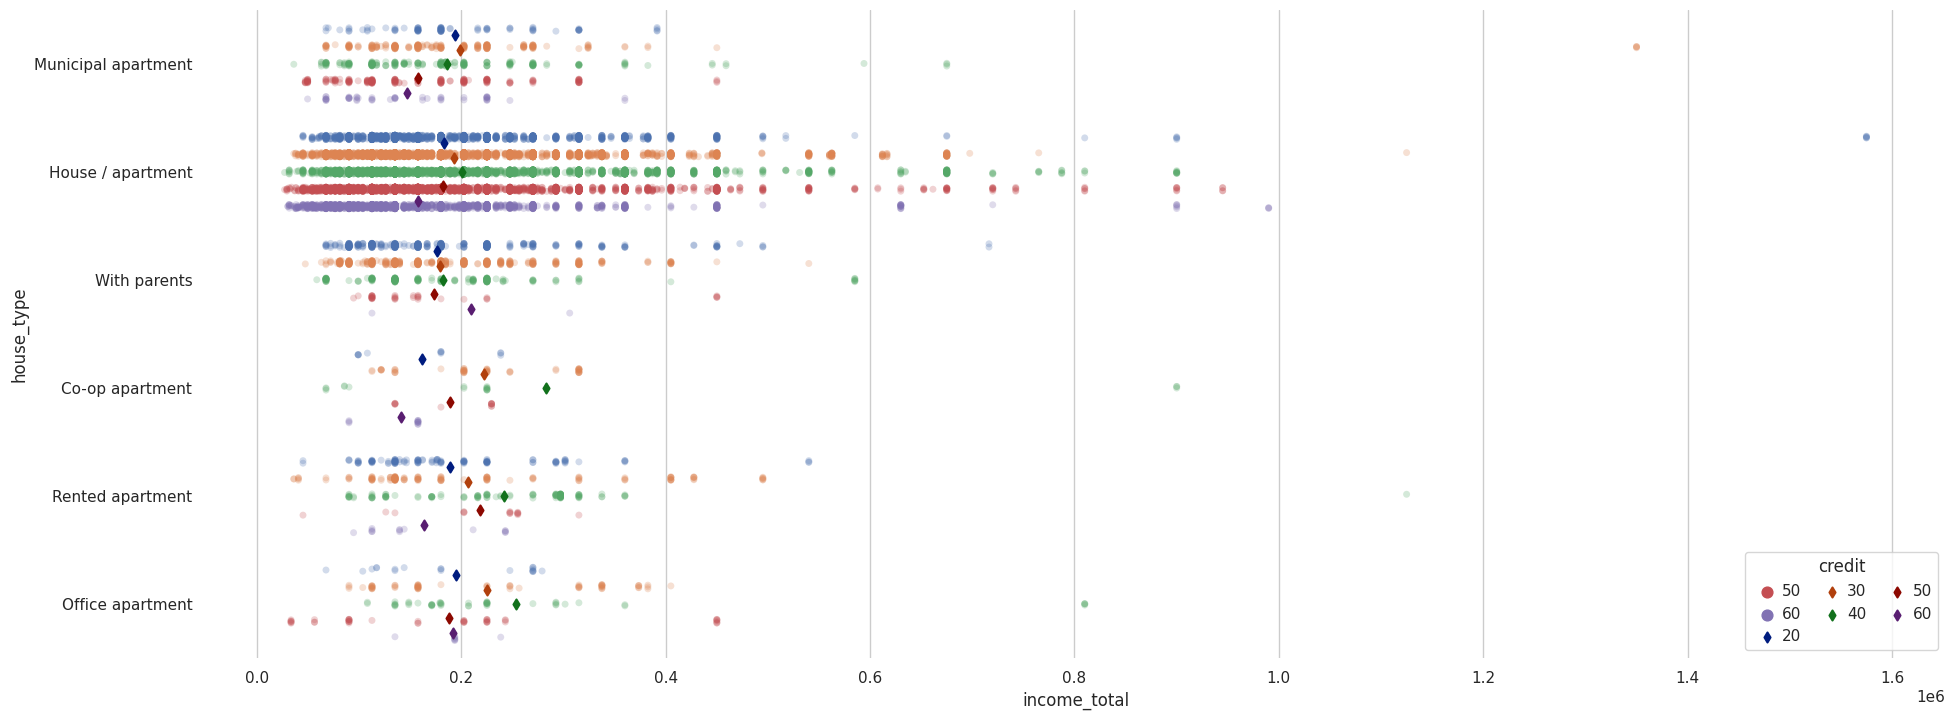

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(train, "credit", var_name="house_type")

# Initialize the figure
f, ax = plt.subplots(figsize=(20,8),dpi=100)
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="income_total", y="house_type", hue="Age",
              data=train, dodge=True, alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="income_total", y="house_type", hue="Age",
              data=train, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="credit",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

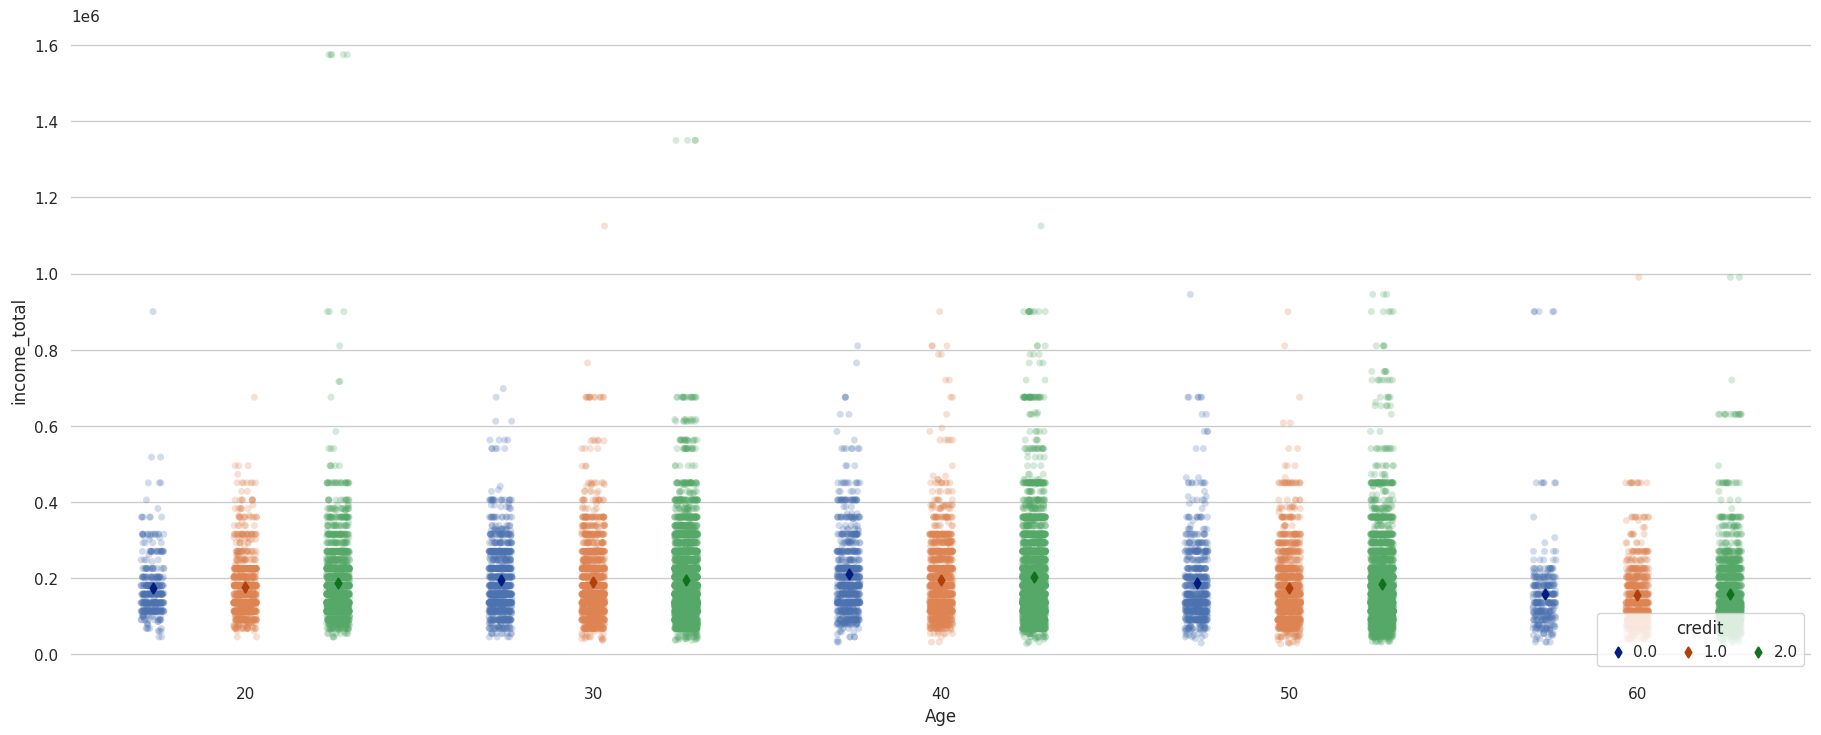

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(train, "credit", var_name="house_type")

# Initialize the figure
f, ax = plt.subplots(figsize=(20,8),dpi=100)
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="Age", y="income_total", hue="credit",
              data=train, dodge=True, alpha=.25, zorder=1)#, hue="Age"

# Show the conditional means
sns.pointplot(x="Age", y="income_total", hue="credit",
              data=train, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)# , hue="Age"

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="credit",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

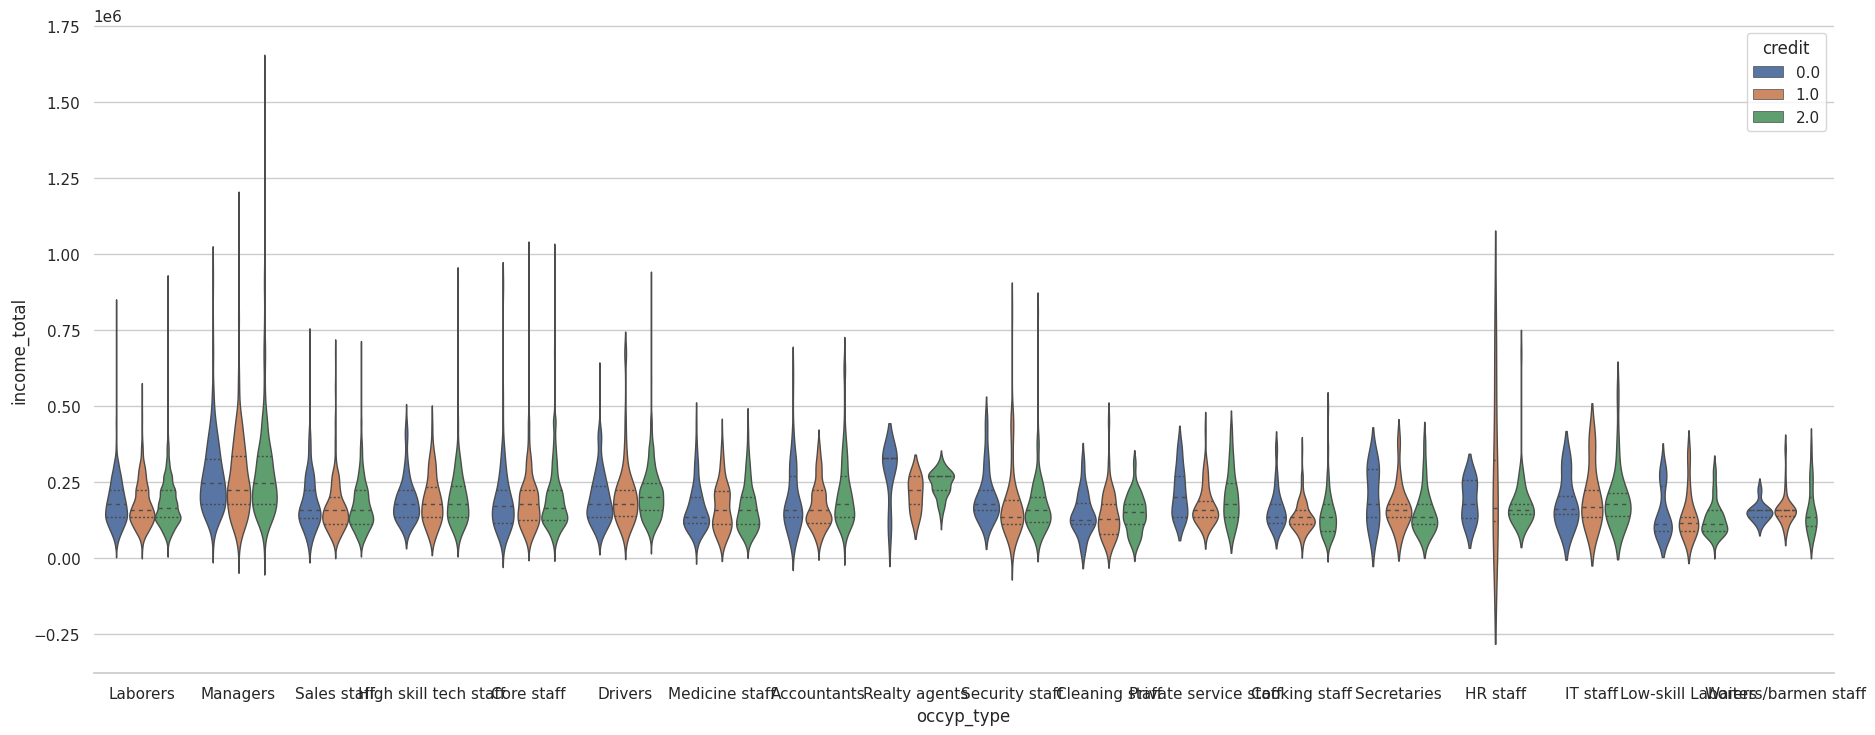

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example tips dataset
f, ax = plt.subplots(figsize=(20,8),dpi=100)
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=train, x="occyp_type", y="income_total", hue="credit",
               split=False, inner="quart", linewidth=1)
sns.despine(left=True)

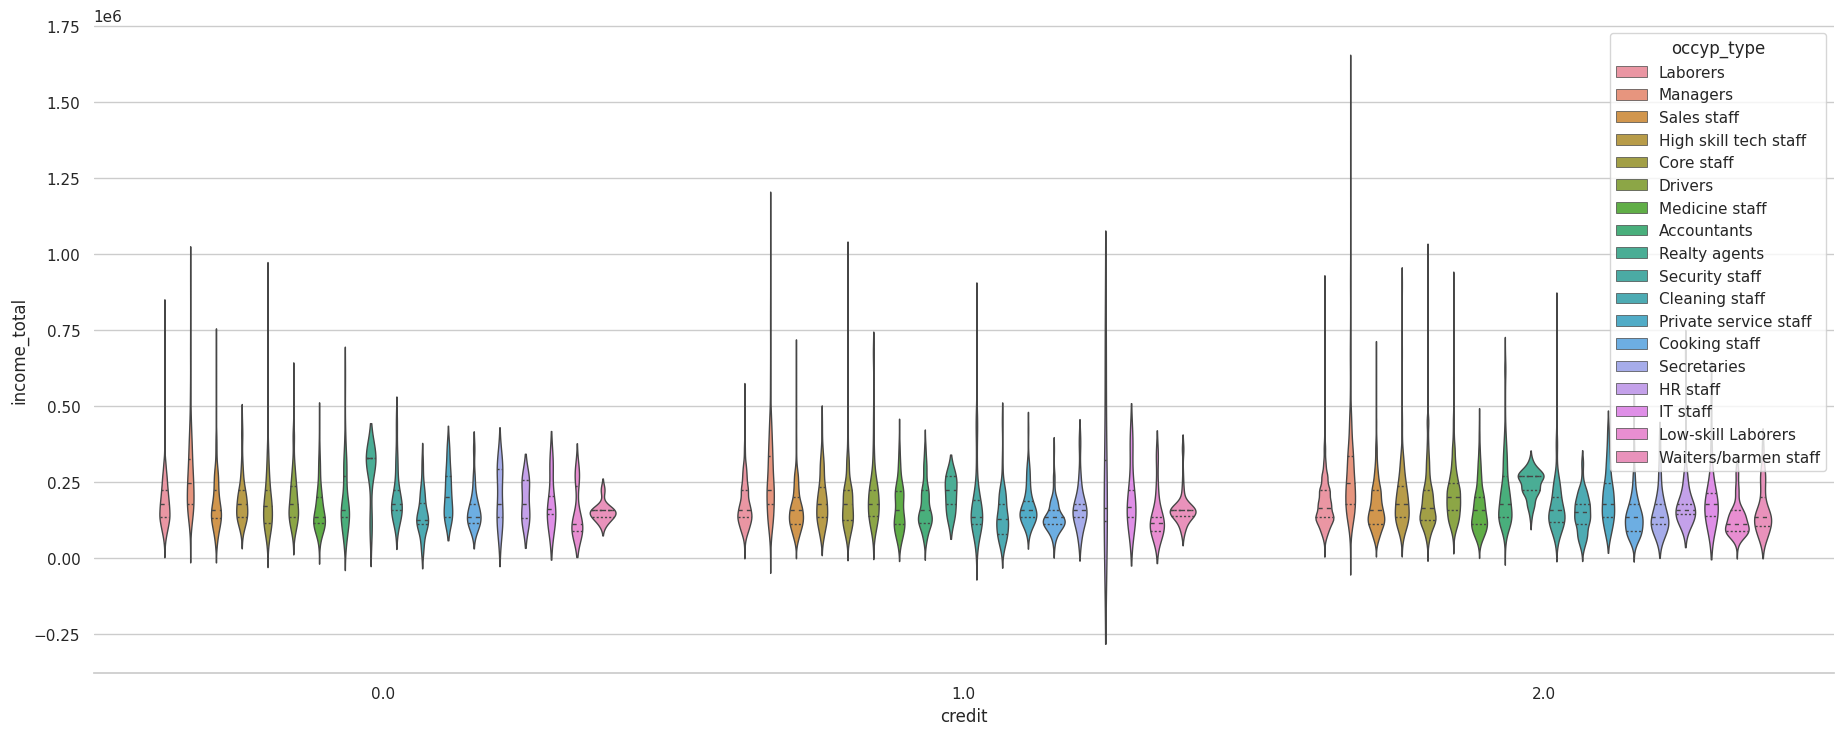

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example tips dataset
f, ax = plt.subplots(figsize=(20,8),dpi=100)
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=train, x="credit", y="income_total", hue="occyp_type",
               split=False, inner="quart", linewidth=1)
sns.despine(left=True)

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(20,8),dpi=100)

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=train,
    x="income_total", hue="credit",
    kind="kde",
    multiple="fill",
    palette="ch:rot=-.25,hue=1,light=.75",
)#, clip=(0, None), height=6

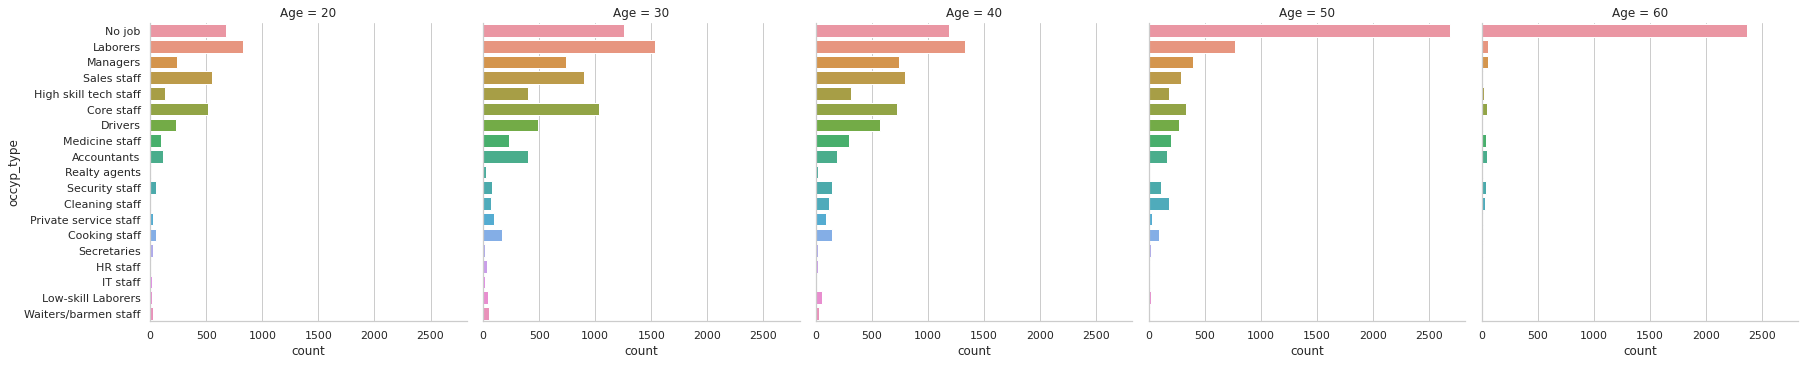

In [ ]:
#plt.subplots(figsize=(16,6),dpi=100)
sns.catplot(y='occyp_type',data = train,col = 'Age',kind='count')#,col = 'DAYS_EMPLOYED',hue='credit'

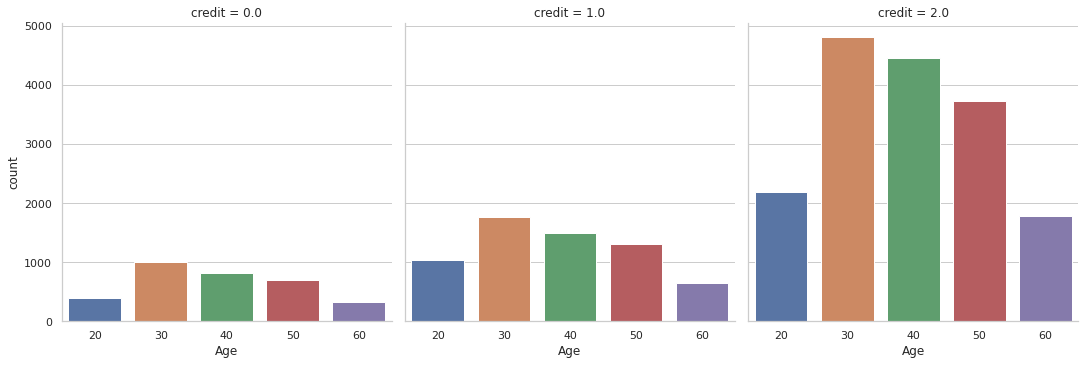

In [ ]:
#plt.subplots(figsize=(16,6),dpi=100)
sns.catplot(x='Age',data = train,col = 'credit',kind='count')#,col = 'DAYS_EMPLOYED',hue='credit'

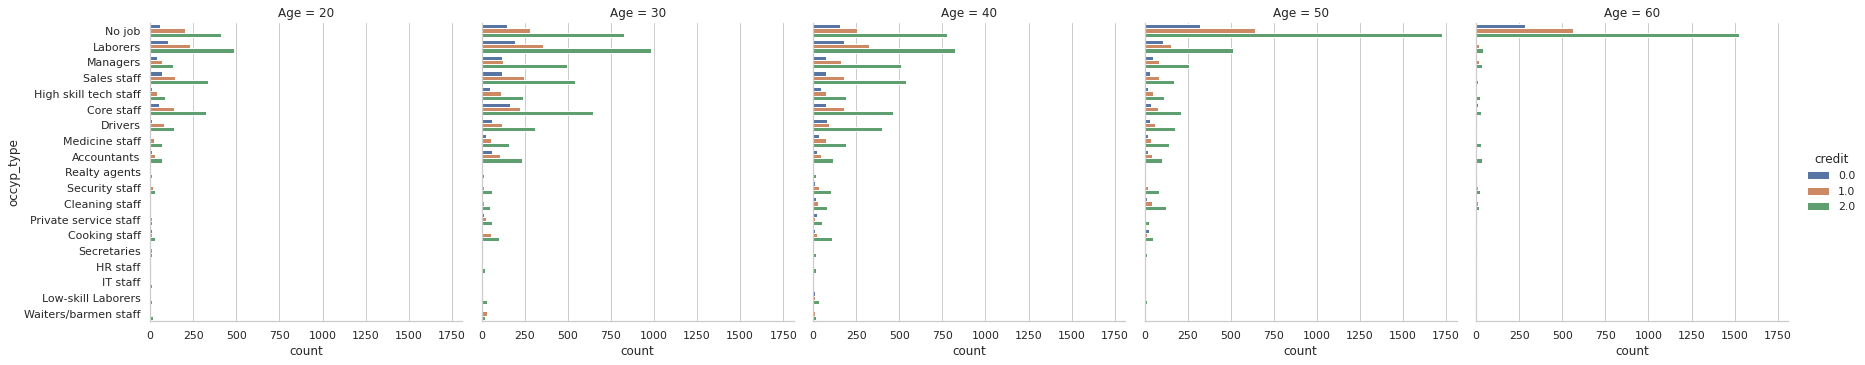

In [ ]:
#plt.subplots(figsize=(16,6),dpi=100)
sns.catplot(y='occyp_type',data = train,col = 'Age',kind='count',hue='credit')#,col = 'DAYS_EMPLOYED',hue='credit'

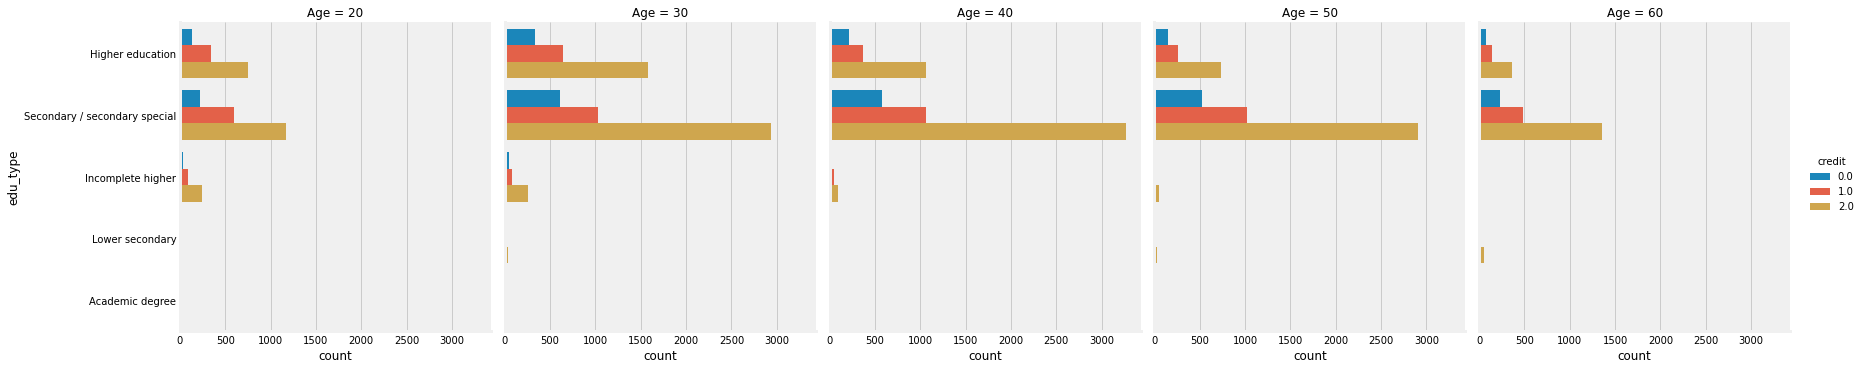

In [ ]:
#plt.subplots(figsize=(16,6),dpi=100)
sns.catplot(y='edu_type',data = train,col = 'Age',kind='count',hue='credit')#,col = 'DAYS_EMPLOYED',hue='credit'

#Binary변수 아닌것들의 분포

	index	gender	car	reality	child_num	income_total	income_type	edu_type	family_type	house_type	DAYS_BIRTH	DAYS_EMPLOYED	FLAG_MOBIL	work_phone	phone	email	occyp_type	family_size	begin_month	credit

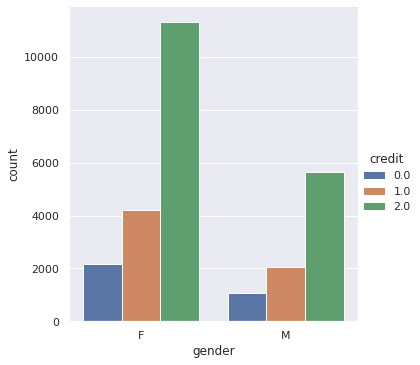

In [23]:
#Gender
sns.catplot(x='gender',data = train,kind='count',hue = 'credit')#,hue='credit'

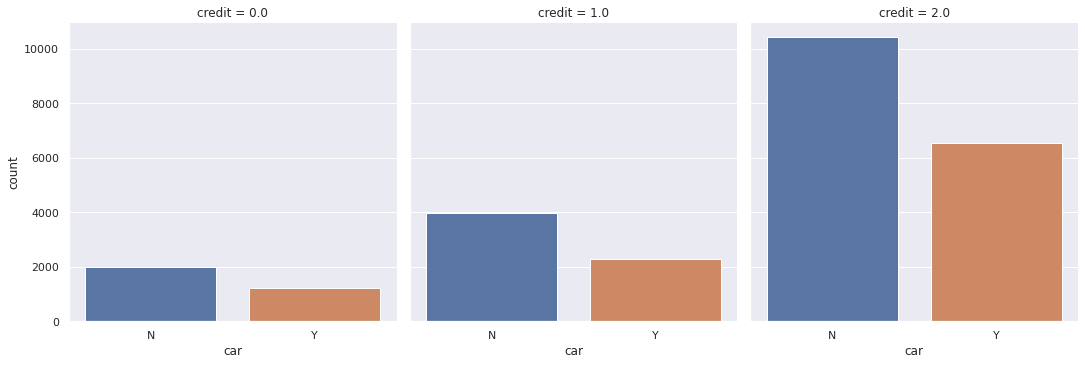

In [25]:
#car
sns.catplot(x='car',data = train,kind='count',col = 'credit')#,hue='credit'

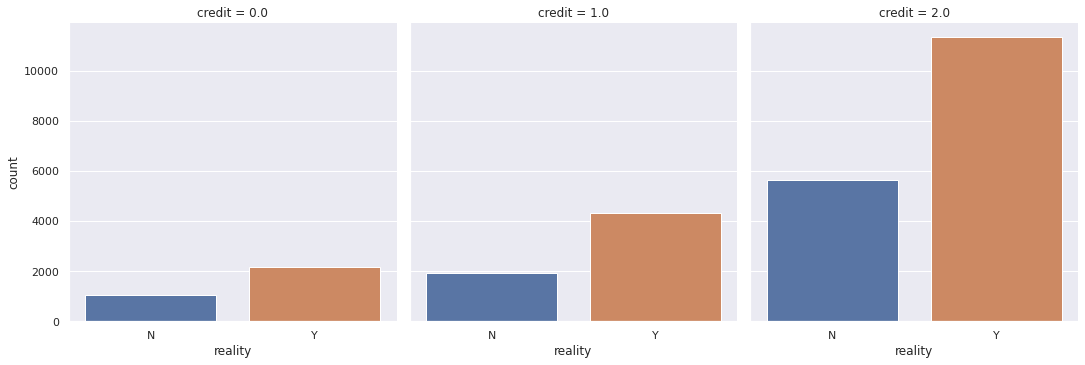

In [26]:
#car
sns.catplot(x='reality',data = train,kind='count',col = 'credit')#,hue='credit'

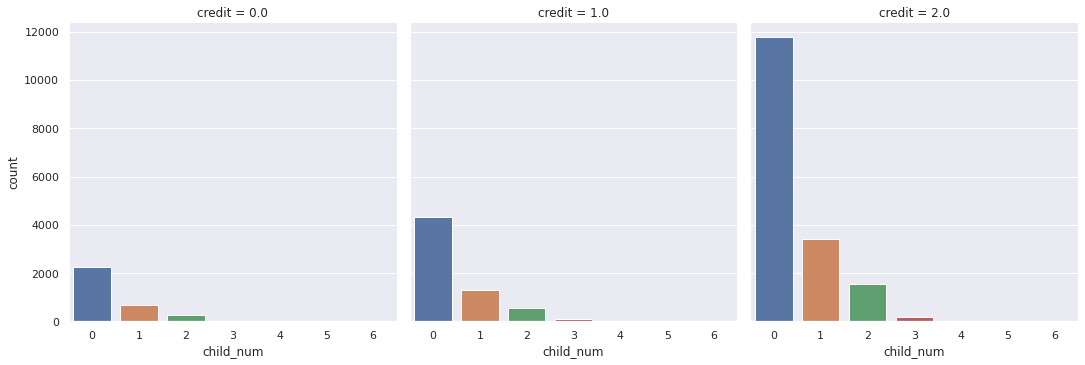

In [29]:
#child_num
sns.catplot(x='child_num',data = train,kind='count',col = 'credit')#,hue='credit'

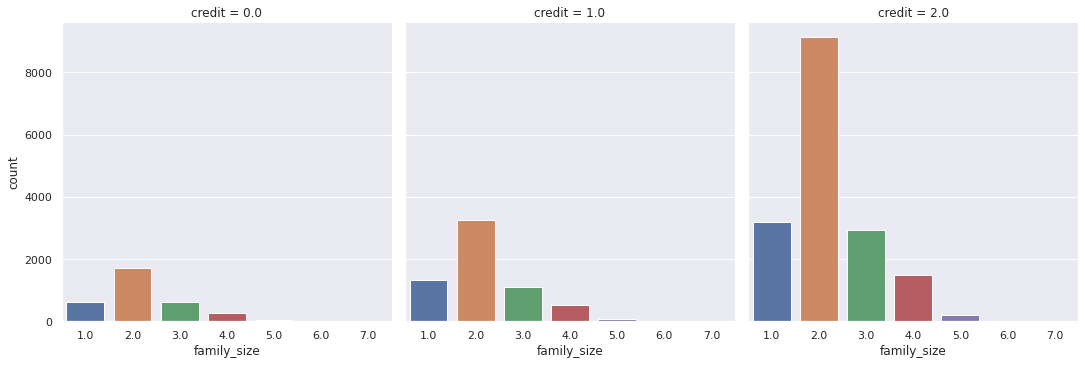

In [69]:
#family_size
sns.catplot(x='family_size',data = train,kind='count',col = 'credit')#,hue='credit'

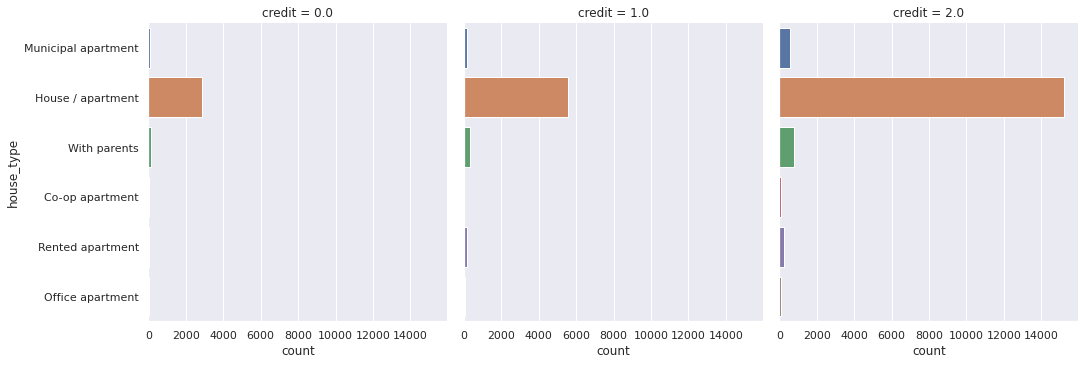

In [71]:
#house_type
sns.catplot(y='house_type',data = train,kind='count',col = 'credit')#,hue='credit'

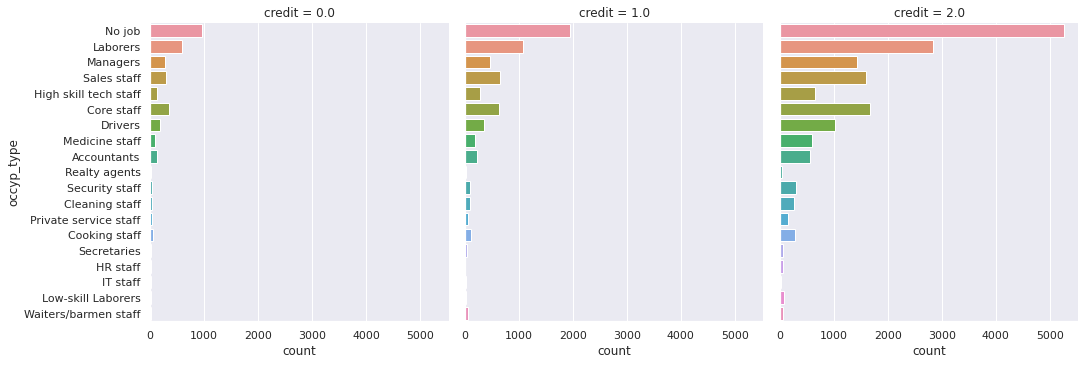

In [74]:
#occyp_type
sns.catplot(y='occyp_type',data = train,kind='count',col = 'credit')#,hue='credit'

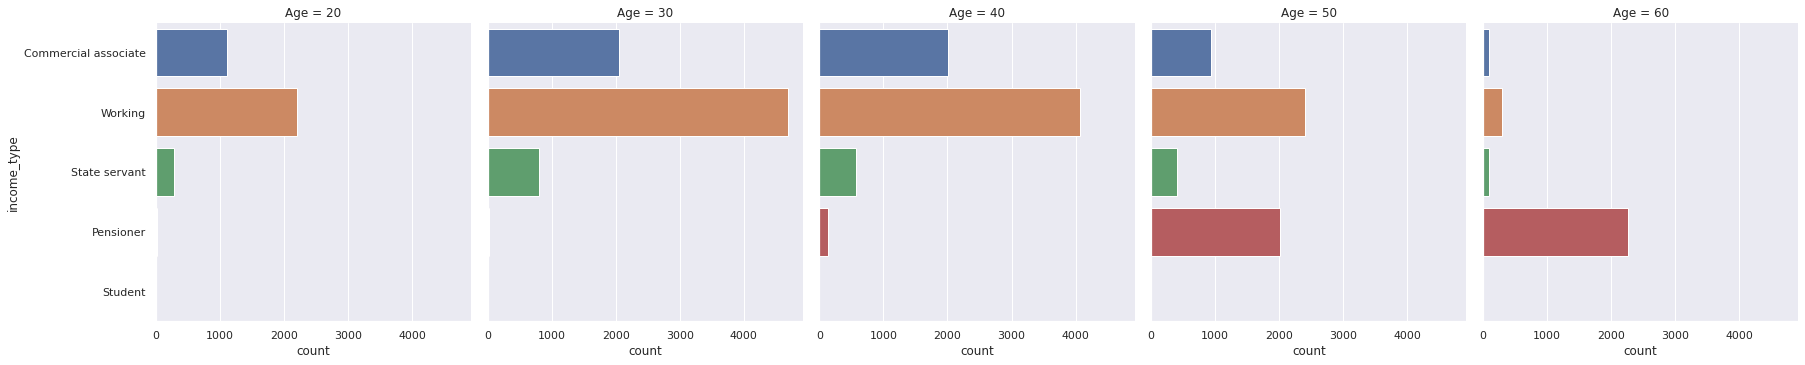

In [76]:
#income_type
sns.catplot(y='income_type',data = train,kind='count',col = 'Age')#,hue='credit'

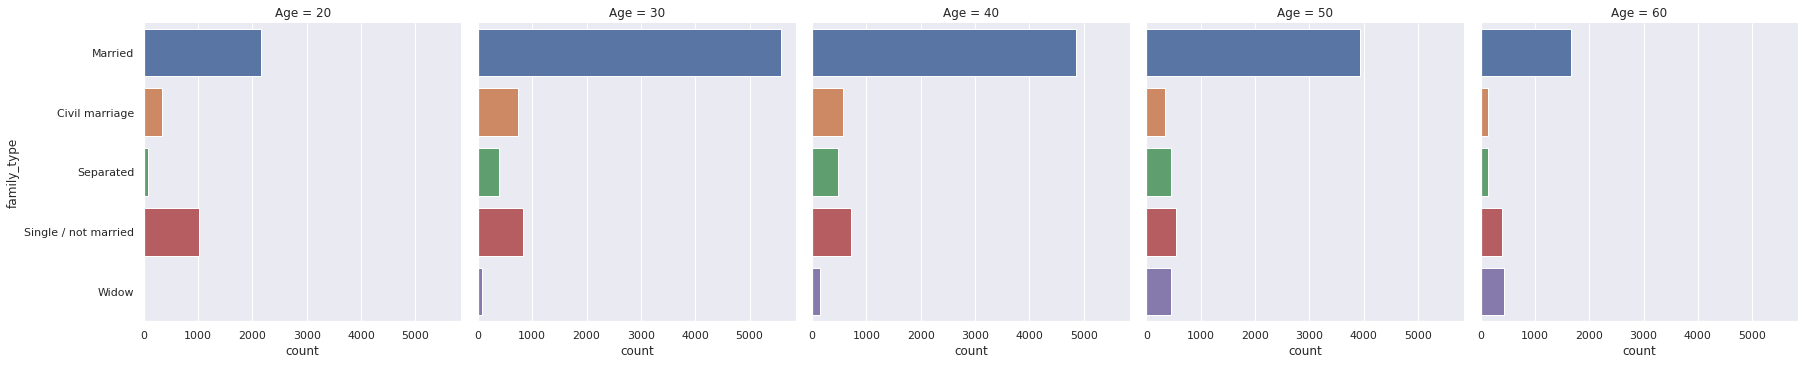

In [83]:
#family_type
sns.catplot(y='family_type',data = train,kind='count',col = 'Age')#,hue='credit'

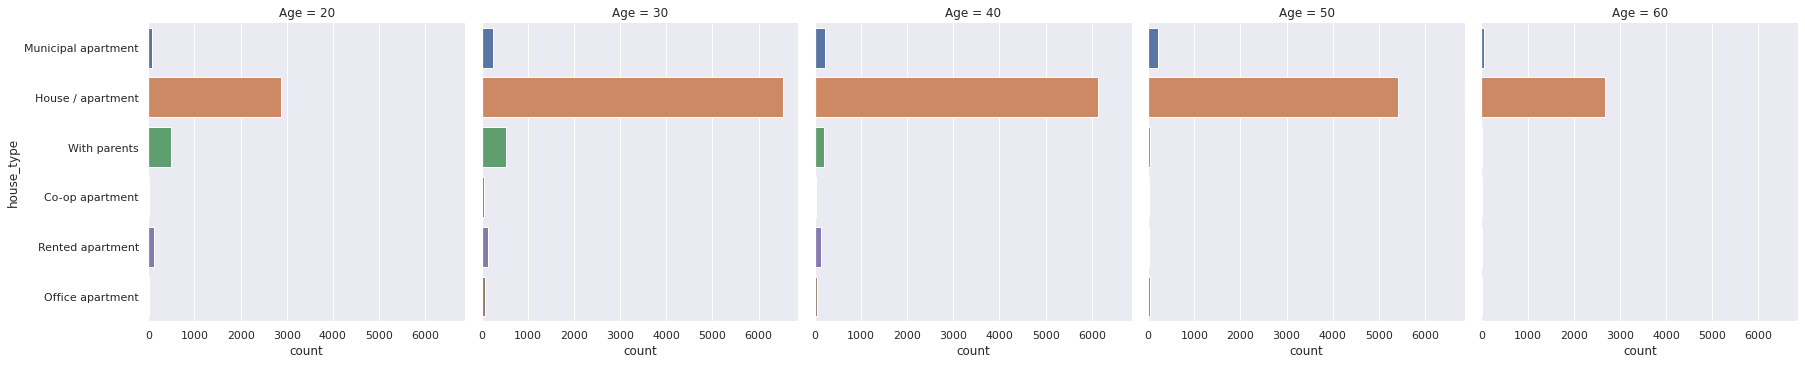

In [82]:
#house_type
sns.catplot(y='house_type',data = train,kind='count',col = 'Age')#,hue='credit'

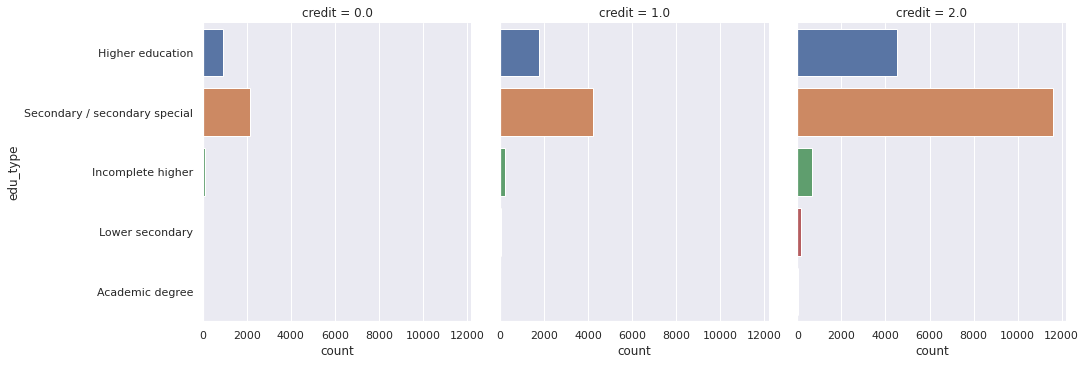

In [86]:
#edu_type
sns.catplot(y='edu_type',data = train,kind='count',col = 'credit')#,hue='credit'

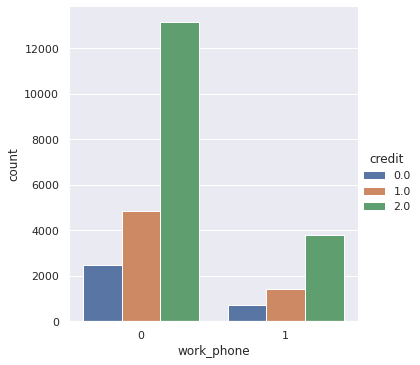

In [87]:
#work_phone
sns.catplot(x='work_phone',data = train,kind='count',hue = 'credit')#,hue='credit'

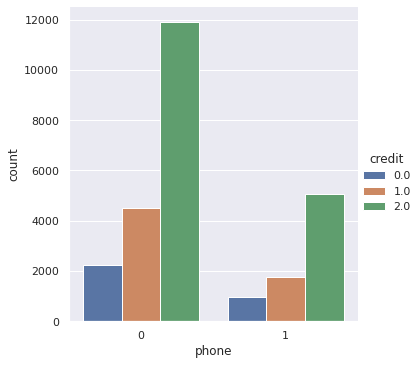

In [88]:
#phone
sns.catplot(x='phone',data = train,kind='count',hue = 'credit')#,hue='credit'

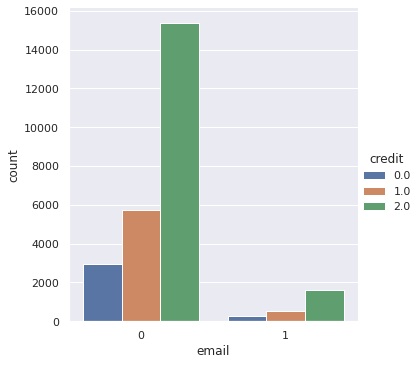

In [89]:
#email
sns.catplot(x='email',data = train,kind='count',hue = 'credit')#,hue='credit'

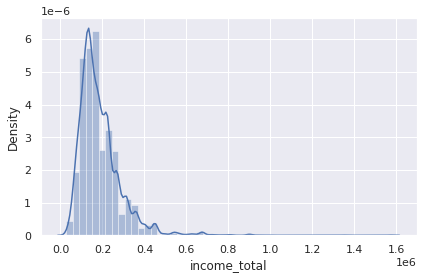

In [41]:
#income_total
sns.distplot(train['income_total'], hist=True )

In [43]:
# Numerical 그래프 함수 정의
def num_plot(column):
  
  fig, axes = plt.subplots(1, 5, figsize=(16, 6))


  sns.distplot(train_0[column],
                ax = axes[0])
  axes[0].tick_params(labelsize=12)
  axes[0].set_title('Age = 20')
  axes[0].set_ylabel('count')

  sns.distplot(train_1[column],
                ax = axes[1])
  axes[1].tick_params(labelsize=12)
  axes[1].set_title('Age = 30')
  axes[1].set_ylabel('count')

  sns.distplot(train_2[column],
                ax = axes[2])
  axes[2].tick_params(labelsize=12)
  axes[2].set_title('Age = 40')
  axes[2].set_ylabel('count')
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  sns.distplot(train_3[column],
                ax = axes[3])
  axes[3].tick_params(labelsize=12)
  axes[3].set_title('Age = 50')
  axes[3].set_ylabel('count')
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  sns.distplot(train_4[column],
                ax = axes[4])
  axes[4].tick_params(labelsize=12)
  axes[4].set_title('Age = 60')
  axes[4].set_ylabel('count')
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [62]:
# 등급에 따른 차이를 보기 위한 데이터 분류
train_0 = train[train['Age']==20]
train_1 = train[train['Age']==30]
train_2 = train[train['Age']==40]
train_3 = train[train['Age']==50]
train_4 = train[train['Age']==60]

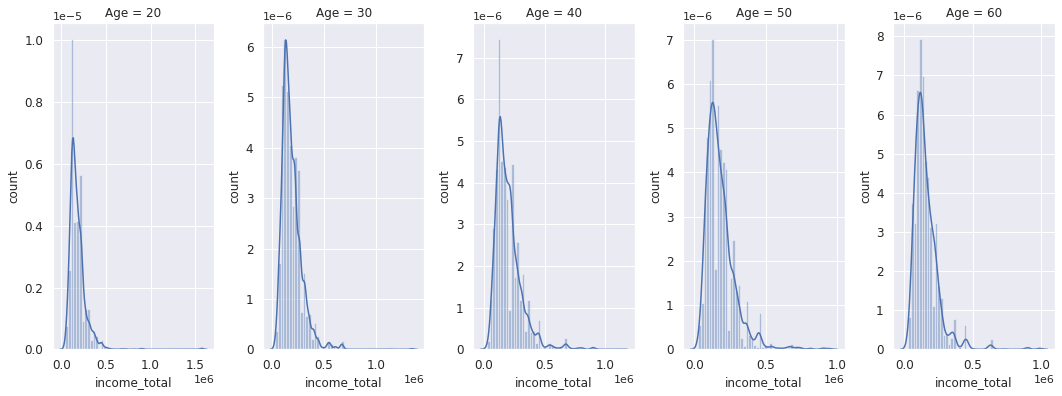

In [45]:
#income_total
num_plot("income_total")

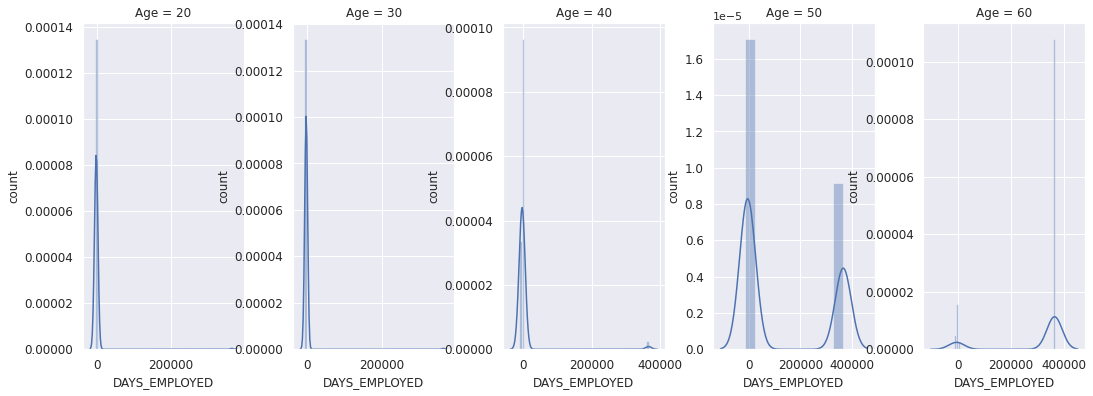

In [46]:
#DAYS_EMPLOYED
num_plot("DAYS_EMPLOYED")

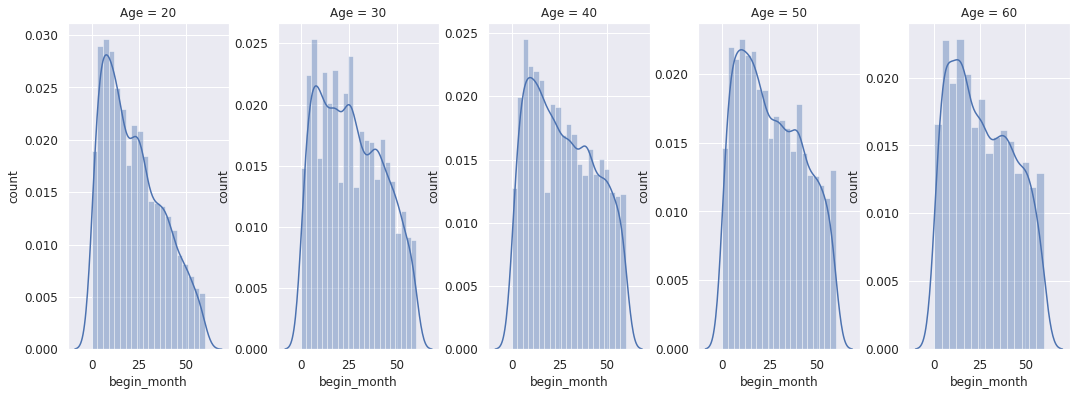

In [66]:
#begin_month
train_0['begin_month'] = abs(train_0['begin_month']).astype(int)
train_1['begin_month'] = abs(train_1['begin_month']).astype(int)
train_2['begin_month'] = abs(train_2['begin_month']).astype(int)
train_3['begin_month'] = abs(train_3['begin_month']).astype(int)
train_4['begin_month'] = abs(train_4['begin_month']).astype(int)
# train_0 = train_0.astype({'Month': 'int'})
# train_1 = train_1.astype({'Month': 'int'})
# train_2 = train_2.astype({'Month': 'int'})
# train_3 = train_3.astype({'Month': 'int'})
# train_4 = train_4.astype({'Month': 'int'})
num_plot("begin_month")

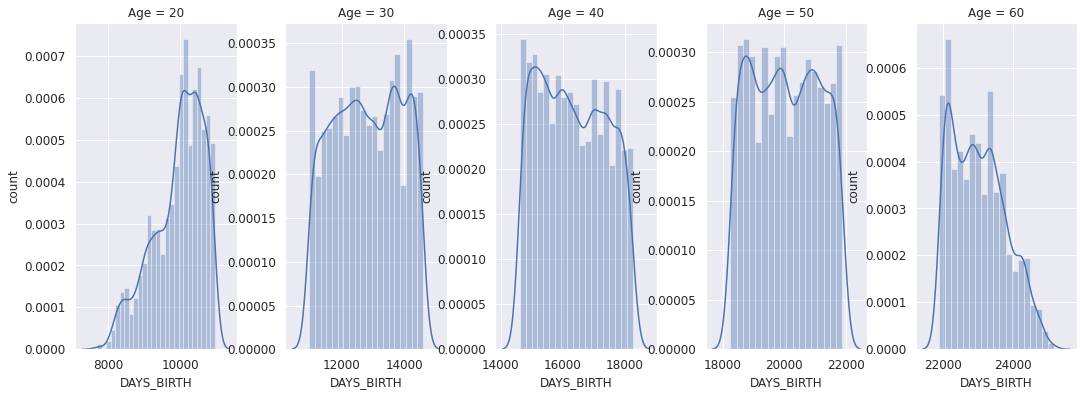

In [68]:
#DAYS_BIRTH
train_0['DAYS_BIRTH'] = abs(train_0['DAYS_BIRTH']).astype(int)
train_1['DAYS_BIRTH'] = abs(train_1['DAYS_BIRTH']).astype(int)
train_2['DAYS_BIRTH'] = abs(train_2['DAYS_BIRTH']).astype(int)
train_3['DAYS_BIRTH'] = abs(train_3['DAYS_BIRTH']).astype(int)
train_4['DAYS_BIRTH'] = abs(train_4['DAYS_BIRTH']).astype(int)
num_plot("DAYS_BIRTH")